In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
# from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
#Categorical columns
categorical_features=[i for i in df.columns if df[i].dtypes=='O']
print(categorical_features)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [8]:
# Numerical columns

numerical_features=[i for i in df.columns if df[i].dtypes!='O']
print(numerical_features)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [9]:
#For numericals features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In description we can have check for some analysis like mean, median, standard deviation percentile range, etc

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Out of the to tal features 4 features are categorical features, 2 are floating values features(including one dependent) and remaining 3 features are integer values

In [11]:
print('Categorical features\n')
for column in categorical_features:
    print(f'Unique items in column {column} are: {df[column].unique()}')

Categorical features

Unique items in column Car_Name are: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' '

We have seen the name of all the different different categories name inside the categorical features

In [12]:
print('Categorical features\n')
for column in categorical_features:
    print(f'Unique items in column {column} are: {df[column].nunique()}')

Categorical features

Unique items in column Car_Name are: 98
Unique items in column Fuel_Type are: 3
Unique items in column Seller_Type are: 2
Unique items in column Transmission are: 2


We have seen the number of the different different categories inside the categorical features count

In [13]:
for column in categorical_features:
    print(df[column].value_counts())
    print()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
TVS Jupyter                1
Yamaha FZ S                1
Honda Activa 125           1
Hero Honda CBZ extreme     1
Hyosung GT250R             1
Name: Car_Name, Length: 98, dtype: int64

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64



Here we are seeing the number of counts of each category inside the categorical feature that how many times it is present inside the data set

In [14]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

Owner is integer data type and it has three categories. It tells you how many times owner is changed or we can also say that how many times that particular car has been sold to some one

In [15]:
#Checking if ther eis any misisng values in the data set or not

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We have seen that there is no missing values in the data set

### Data Visualization

**1) Frequency Counts of the features**

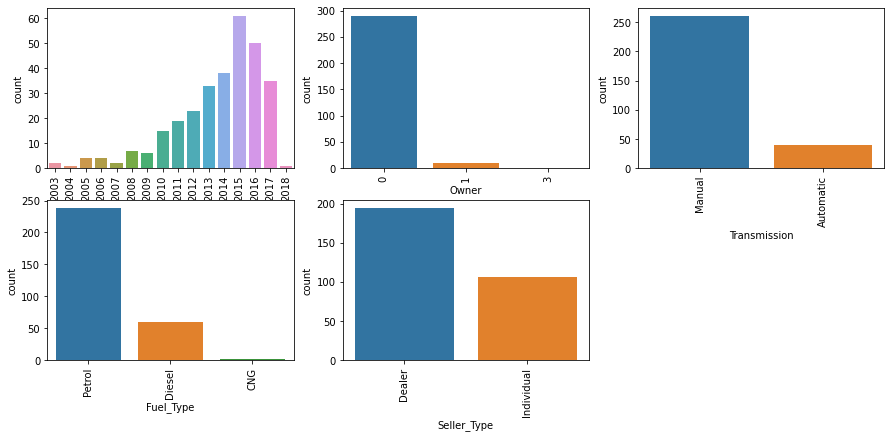

In [16]:
plt.figure(figsize=(15,10))
plot=1

for i in ['Year','Owner','Transmission','Fuel_Type','Seller_Type']:
    plt.subplot(3,3,plot)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/years_owner_transmission_fueltype_sellerType_frequency.jpg')

Car_name feature is not taken as it hase huge number of categories so for better visualization it just removed for a while

**Years**: We see that in year 2015 is having the highest count so we can say that in the data set car which was purchased in 2015 is highest as compared with any other years

**Owner**: we see that those cars which are not been solde to any one till yet and are in the hand of first owner are having maximum counts

**Transmission**: Mannual transmission cars are having highest counts

**Fuel_Type**:Cars which are run on petrol are having maximum number in data set followed by diesel and CNG

**Seller_Type**: Cars which are present under the dealers are having maximum counts as compared with the individual owner who are willing to sell his car

**2) Numerical Fetaures vs Selling Price of the car**

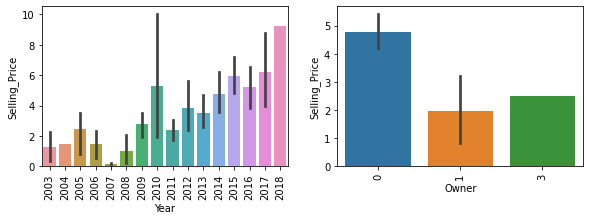

In [17]:
plt.figure(figsize=(15,10))
plot=1

for i in ['Year','Owner']:
    plt.subplot(3,3,plot)
    sns.barplot(x=i,y='Selling_Price',data=df)
    plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/fuel_seller_transmission_VS_selling_price.jpg')

Car which have been purchased in 2018 are having higher value of selling price. The reason may be it is new when compared with other years.
There is another year which is giving a contrast in this analysis, cars purchased in 2010 is having higher selling price as compared with year 2011,2012,2013,2014.
This is may be due to the some other factors also like number of times owner is changed may be low as 0, kilometer runs may be less, etc.

Cars purchased in 2007 got the lowest selling price

When number of owner was not changed then the selling was prices was pretty much high. It is pretty obvious also because the car which runs single hand can have a good resale price plus it is also depends on the km runs as well as how good was the seller for that car thats's why the selling price for those cars whose owner is change 3 times is higher than those of 1

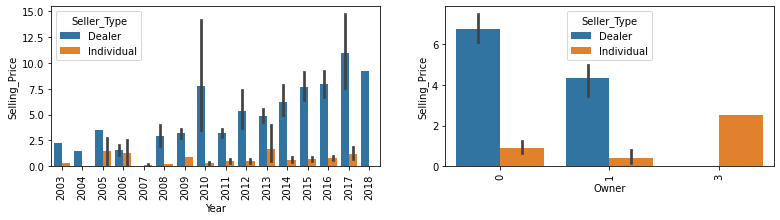

In [18]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Year','Owner']:
    plt.subplot(3,3,plot)
    sns.barplot(x=i,y='Selling_Price',data=df,hue='Seller_Type')
    plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/years_owner_VS_Selling_price(hue=seller_type).jpg')

By the above graph we can easily find out that whenever the the car dealer has sold the car, it gets good amout of selling price as compared with the individual seller.
In case of owner=3, dealer was not interested to sell the car but still the individual was pretty much good in selling the car.

Cars which were purchased in 2017 was sold in a good amout by the dealer as compared with others and cars purchsed in 2007 sold at very low cost by dealer 

In [19]:
# Creating another feature which will store the number of years that particular car have till now
df['Number_of_years']=2021-df['Year']

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


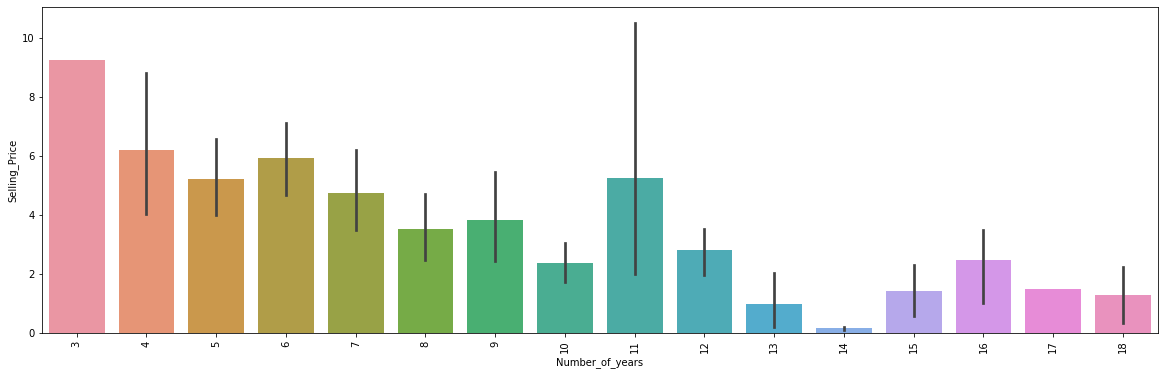

In [21]:
plt.figure(figsize=(20,6))
sns.barplot(y='Selling_Price',x='Number_of_years',data=df)
plt.xticks(rotation=90)
plt.savefig('./Graphs/NumberOfYears_VS_selling_price.jpg')
plt.show()

As the number of years is higher the selling price is getting dropped. It is pretty obvious because re sale valu eis indirectly proportional to the time period

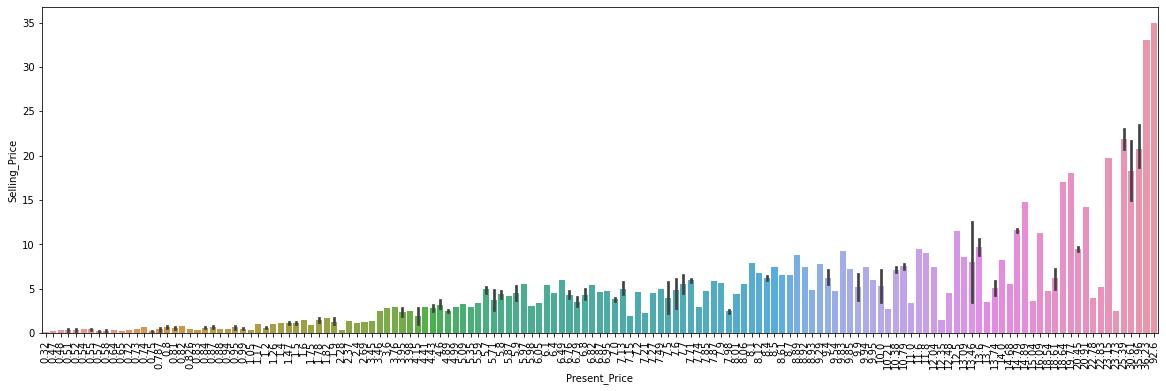

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(x='Present_Price',y='Selling_Price',data=df)
plt.xticks(rotation=90)
plt.savefig('./Graphs/presentprice_VS_selling_price.jpg')
plt.show()

If we check the trend of present price vs the selling price, we see that it is not linear in nature. Somewhere where present price is low, selling price is high as compared with som eother corresponding prices. So there is no linear trend in the comparison. 
May be because of outliers or may be because of the car make or may be because of the time it is being used or other factors as well. We will look into this in further analysis

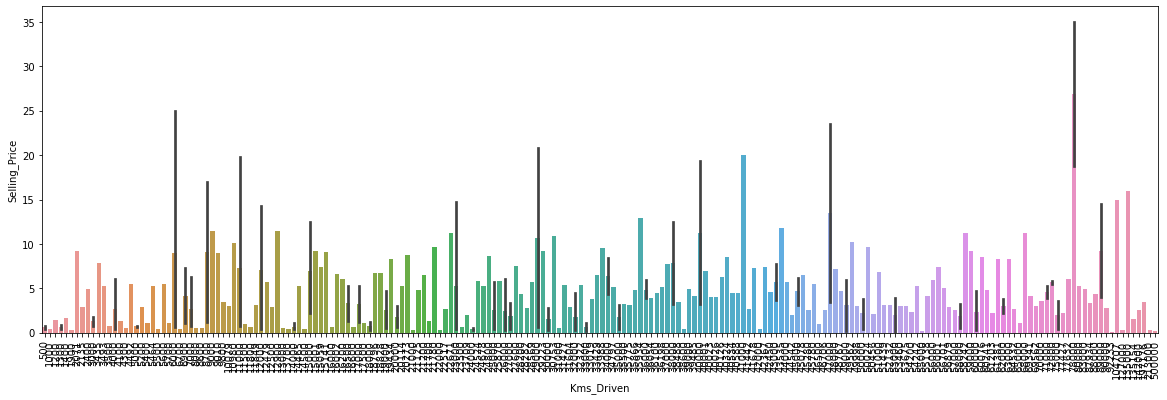

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x='Kms_Driven',y='Selling_Price',data=df)
plt.xticks(rotation=90)
plt.savefig('./Graphs/kilometers_VS_selling_price.jpg')
plt.show()

In kilometer runs also ther eis no linear trend. So we cant say that higher the km lower the price or vice-versa. It may impacted by different different parameters

**3) Categorical Fetaures vs Selling Price of the car**

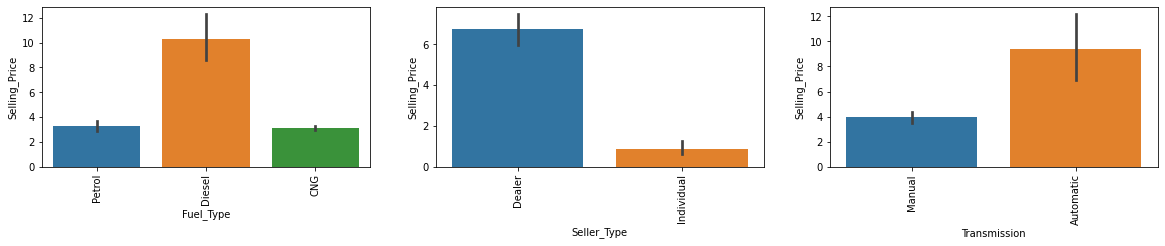

In [24]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Fuel_Type','Seller_Type','Transmission']:
    plt.subplot(3,3,plot)
    sns.barplot(x=i,y='Selling_Price',data=df)
    plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/fuel_seller_transmission_VS_selling_price.jpg')

**Fuel_type**: Diesel car gets the higher resale value. This is may be because the diesel car price is higher than the petrol price

**Seller_type**: When ever the dealer has sold the car, he has sold it for higher price as compared with the individual person. This is may be becaus of how good he was in selling the cars or may be dealer has given the warranty or services for few years or may be he hs done some testing and all then given the buyer's a trial and on the basis of those things may be he gets the higher prices

**Transmission**: It is obvious that the automatic transmission cars are higher is cost, thts why they sold in higher selling price

In [25]:
# Deleting the Year column
df.drop(columns='Year',axis=1,inplace=True)

In [26]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Correlation

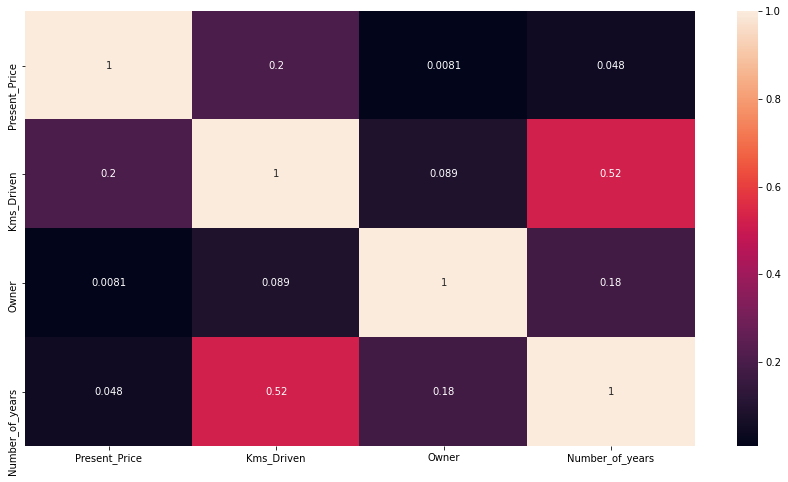

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(columns='Selling_Price').corr(),annot=True)
plt.savefig('./Graphs/independent_variables_correlation_heat_map.jpg')

In [28]:
columns=set()
corr_matrix=df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.90:
            col=df.columns[i]
            columns.add(col)
print(f'Number of columns which are highly correlated i.e. more than 90% correlation are: {len(columns)}')

Number of columns which are highly correlated i.e. more than 90% correlation are: 0


So hence there are no such columns which are highly correlated so we will not delete any of them

### Standard Deviation

In [29]:
numerical_features=numerical_features+['Number_of_years']

In [30]:
numerical_features

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Number_of_years']

In [31]:
numerical_features.pop(4)

'Owner'

In [32]:
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Number_of_years']

In [33]:
std_zero_columns=[]
for i in numerical_features[1:]:
    if (np.std(df[i])==0):
        std_zero_columns.append(i)
print(f'Number of columns having zero standard deviation are: {len(std_zero_columns)}')

Number of columns having zero standard deviation are: 0


Since there are no such columns whose standard deviations are ero so we will not removed them

## Feature Engineering

In [34]:
df.drop(columns='Car_Name',axis=1,inplace=True)

In [35]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


**One hot Encoding** - Dummy Variable Trap

In [36]:
x=pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']])
x

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0,0,1,1,0,0,1
1,0,1,0,1,0,0,1
2,0,0,1,1,0,0,1
3,0,0,1,1,0,0,1
4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...
296,0,1,0,1,0,0,1
297,0,0,1,1,0,0,1
298,0,0,1,1,0,0,1
299,0,1,0,1,0,0,1


In [37]:
dummy_variables=pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)

In [38]:
dummy_variables.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [39]:
df2=pd.concat([df,dummy_variables],axis=1)

In [40]:
df2.drop(columns='Fuel_Type',axis=1,inplace=True)

In [41]:
df2.drop(columns=['Seller_Type','Transmission'],axis=1,inplace=True)

In [42]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


**Checking normality via graphs**

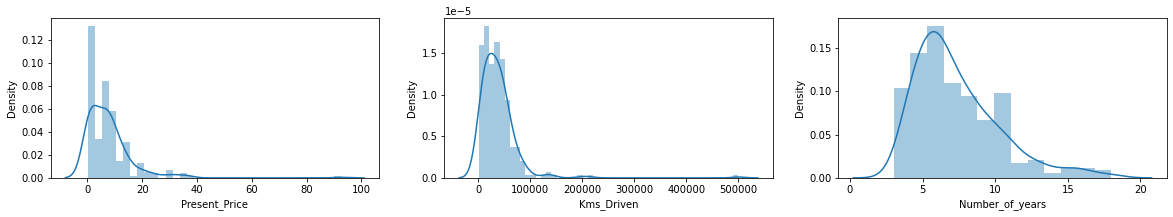

In [43]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Present_Price','Kms_Driven','Number_of_years']:
    plt.subplot(3,3,plot)
    sns.distplot(df2[i])
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Normality_first_check.jpg')

In graphs we have seen that none of them are perfectly normal distributed curve. So we need to make it normally distributed first. But before that lets check the outeliers if any

**Chceking outliers**

In [44]:
df2.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

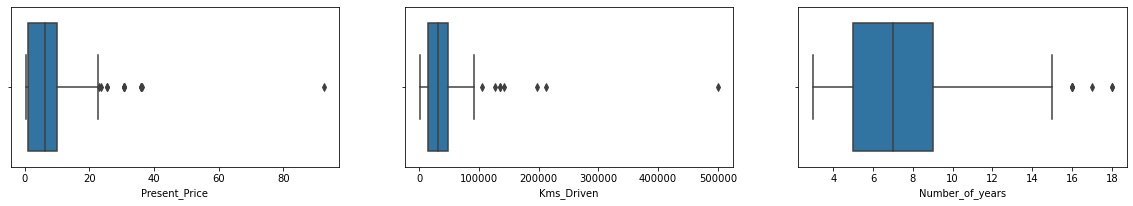

In [45]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Present_Price','Kms_Driven','Number_of_years']:
    plt.subplot(3,3,plot)
    sns.boxplot(df2[i],orient="h")
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Boxplot_for_outliers_detection.jpg')

In [46]:
# shape before removing outliers

df2.shape

(301, 9)

In [47]:
for i in ['Present_Price','Kms_Driven','Number_of_years']:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    df2 = df2[(df2[i]>lower) & (df2[i]<upper)]
    

In [48]:
df2.shape

(275, 9)

In [49]:
print(f'Percentage of data removed afetr outliers detection {round(((301-275)/301)*100,2)}%')

Percentage of data removed afetr outliers detection 8.64%


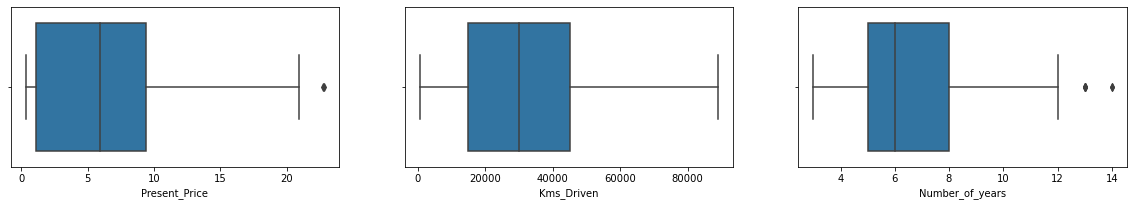

In [50]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Present_Price','Kms_Driven','Number_of_years']:
    plt.subplot(3,3,plot)
    sns.boxplot(df2[i],orient="h")
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Boxplot_after_removing_outliers.jpg')

Outliers are removed. Few are still there but they are a very very small in number. So let it be

**Checking Normality of the features**

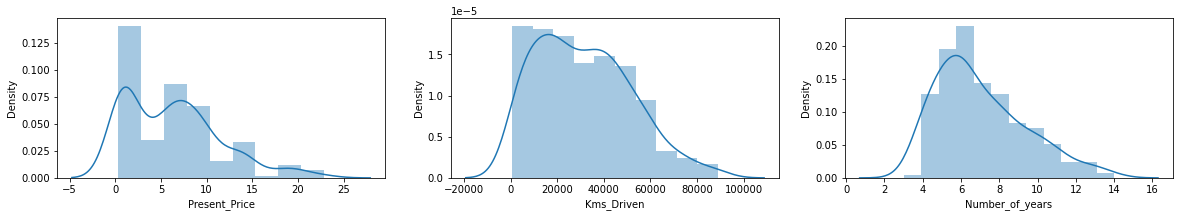

In [51]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Present_Price','Kms_Driven','Number_of_years']:
    plt.subplot(3,3,plot)
    sns.distplot(df2[i])
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Normality_after outliers_removed.jpg')

Data still are not in a normally distributed form

**Separting independent features and dependent feature**

In [52]:
X=df2.drop(columns='Selling_Price')
Y=df2[['Selling_Price']]

In [53]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [54]:
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


**Normalization**

In [55]:
for i in X.columns:
    X[i] = X[i].apply(lambda a : np.log(a+1))
X

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.885553,10.203629,0.0,2.079442,0.000000,0.693147,0.0,0.693147
1,2.355178,10.668979,0.0,2.197225,0.693147,0.000000,0.0,0.693147
2,2.384165,8.839422,0.0,1.609438,0.000000,0.693147,0.0,0.693147
3,1.638997,8.556606,0.0,2.397895,0.000000,0.693147,0.0,0.693147
4,2.063058,10.656106,0.0,2.079442,0.693147,0.000000,0.0,0.693147
...,...,...,...,...,...,...,...,...
296,2.533697,10.433792,0.0,1.791759,0.693147,0.000000,0.0,0.693147
297,1.931521,11.002117,0.0,1.945910,0.000000,0.693147,0.0,0.693147
298,2.484907,11.384353,0.0,2.564949,0.000000,0.693147,0.0,0.693147
299,2.602690,9.105091,0.0,1.609438,0.693147,0.000000,0.0,0.693147


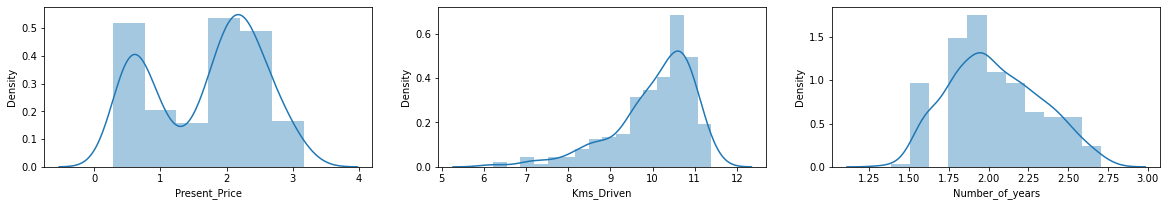

In [56]:
plt.figure(figsize=(20,10))
plot=1

for i in ['Present_Price','Kms_Driven','Number_of_years']:
    plt.subplot(3,3,plot)
    sns.distplot(X[i])
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Normality_after_normalization.jpg')

Even after normalization data are still not in normal distribution form

**Standardization**

In [57]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std_data=std.fit_transform(X)
std_df=pd.DataFrame(std_data,columns=X.columns)
std_df.head()

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.238291,0.183645,-0.194257,0.132357,-0.454027,0.465633,-0.744092,0.316228
1,0.806079,0.663723,-0.194257,0.549803,2.202513,-2.147614,-0.744092,0.316228
2,0.841126,-1.223739,-0.194257,-1.533428,-0.454027,0.465633,-0.744092,0.316228
3,-0.059802,-1.515505,-0.194257,1.261020,-0.454027,0.465633,-0.744092,0.316228
4,0.452899,0.650442,-0.194257,0.132357,2.202513,-2.147614,-0.744092,0.316228


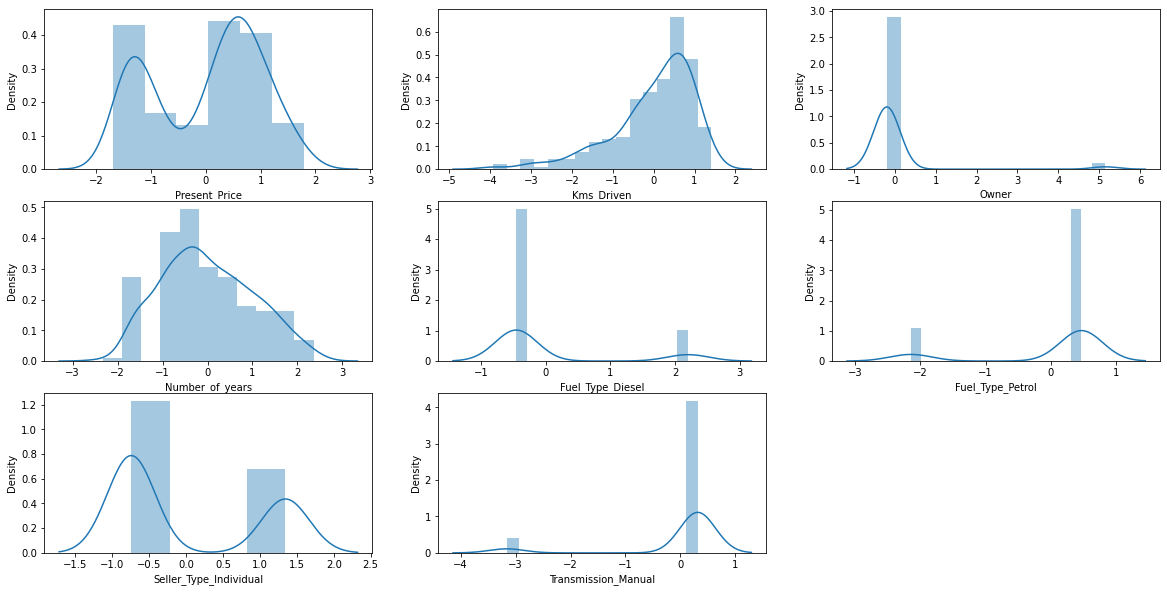

In [58]:
plt.figure(figsize=(20,10))
plot=1

for i in std_df.columns:
    plt.subplot(3,3,plot)
    sns.distplot(std_df[i])
#     plt.xticks(rotation=90)
    plot+=1
plt.savefig('./Graphs/Normality_after_standardisation.jpg')

**Important Features**

In [59]:
model=ExtraTreesRegressor(random_state = 101)
model.fit(std_df,Y)

ExtraTreesRegressor(random_state=101)

In [60]:
imp_features=pd.DataFrame(model.feature_importances_,index=X.columns)

In [61]:
imp_features.reset_index(inplace=True)

In [62]:
imp_features.rename(columns={'index':'Features',0:'Values'},inplace=True)

In [63]:
imp_features.nlargest(10,columns='Values')

,Features,Values
0,Present_Price,0.458203
6,Seller_Type_Individual,0.346631
3,Number_of_years,0.124685
1,Kms_Driven,0.030893
4,Fuel_Type_Diesel,0.022702
7,Transmission_Manual,0.008293
5,Fuel_Type_Petrol,0.008206
2,Owner,0.000388


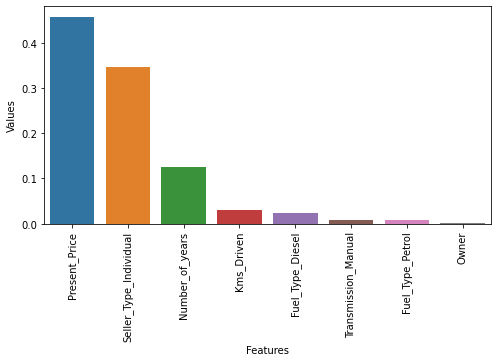

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(x='Features',y='Values',data=imp_features.nlargest(10,columns='Values'))
plt.xticks(rotation=90)
plt.savefig('./Graphs/Feature_importance.jpg')

## Modeling

In [65]:
X_data=std_df
Y_data=Y

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.20,random_state=101)

In [67]:
x_train

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
31,0.102521,0.902525,-0.194257,1.261020,-0.454027,0.465633,-0.744092,0.316228
148,-1.519355,-0.493886,-0.194257,-0.340904,-0.454027,0.465633,1.343921,0.316228
69,1.211571,0.936229,-0.194257,0.923222,-0.454027,0.465633,-0.744092,0.316228
81,-0.805222,-1.786113,-0.194257,-1.533428,-0.454027,0.465633,1.343921,0.316228
225,1.200033,0.478530,-0.194257,-0.887245,2.202513,-2.147614,-0.744092,0.316228
...,...,...,...,...,...,...,...,...
40,0.495166,0.972430,-0.194257,2.115746,-0.454027,0.465633,-0.744092,0.316228
75,1.556717,1.195493,-0.194257,0.923222,-0.454027,0.465633,-0.744092,0.316228
87,-0.933572,-0.234634,-0.194257,-0.887245,-0.454027,0.465633,1.343921,0.316228
63,0.442097,0.480423,-0.194257,-0.340904,-0.454027,0.465633,-0.744092,0.316228


In [68]:
ln_parameter = {"fit_intercept": [True, False]}

dt_parameter = {"splitter":["best","random"],
                "max_depth" : [1,3,5,7,9,11,12],
                "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                "max_features":["auto","log2","sqrt"], "max_leaf_nodes":[2,3,5,10,20,30,40,50,60,70,80,90]
                }
        
rf_parameter = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
                }
        
        
gb_parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                             'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                             'max_depth':[2,3,4,5,6,7],
                             'min_samples_split':[2,4,6,8,10,20,40,60,100],
                             'min_samples_leaf':[1,3,5,7,9],
                             'max_features':[2,3,4,5,6,7],
                             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
                            }
        
                
xgb_parameter = {"learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                             "max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],
                             "min_child_weight":[ 1, 3, 5, 7 ],
                             "gamma":[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                             "colsample_bytree":[ 0.3, 0.4, 0.5 , 0.7 ]
                             }


In [85]:
ln_reg=LinearRegression()
dt_reg=DecisionTreeRegressor()
rf_reg=RandomForestRegressor()
gb_reg=GradientBoostingRegressor()
# xgb_reg=XGBRegressor()
 
#Randomized Search CV    
ln_random = RandomizedSearchCV( estimator = ln_reg, param_distributions = ln_parameter, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs=-1)
dt_random = RandomizedSearchCV( estimator = dt_reg, param_distributions = dt_parameter, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV( estimator = rf_reg, param_distributions = rf_parameter, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs=-1)
gb_random = RandomizedSearchCV( estimator = gb_reg, param_distributions = gb_parameter, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs=-1)
# xgb_random = RandomizedSearchCV( estimator = xgb_reg, param_distributions = xgb_parameter, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs=-1)

#Fitting the data
ln_random.fit(x_train,y_train)
dt_random.fit(x_train,y_train)
rf_random.fit(x_train,y_train)
gb_random.fit(x_train,y_train)
# xgb_random.fit(x_train,y_train)

# Getting best parameters for LinearRegression
fit_intercept_ln = ln_random.best_params_["fit_intercept"]

#LinearRegression Object
ln_reg = LinearRegression(fit_intercept=fit_intercept_ln)
ln_reg.fit(x_train,y_train)
ln_predict = ln_reg.predict(x_test)
score_ln_reg = r2_score(y_test,ln_predict)

# Getting best parameters for DecisiontreeRegressor
splitter_dt = dt_random.best_params_["splitter"]
max_depth_dt = dt_random.best_params_["max_depth"]
min_samples_leaf_dt = dt_random.best_params_["min_samples_leaf"]
min_weight_fraction_leaf_dt = dt_random.best_params_["min_weight_fraction_leaf"]
max_features_dt = dt_random.best_params_["max_features"]
max_leaf_nodes_dt = dt_random.best_params_["max_leaf_nodes"]

#Decision tree object
dt_reg=DecisionTreeRegressor(splitter=splitter_dt,
                             max_depth=max_depth_dt,
                             min_samples_leaf=min_samples_leaf_dt,
                             min_weight_fraction_leaf=min_weight_fraction_leaf_dt,
                            max_features=max_features_dt,max_leaf_nodes=max_leaf_nodes_dt)
dt_reg.fit(x_train,y_train)
dt_predict = dt_reg.predict(x_test)
score_dt = r2_score(y_test,dt_predict)


# Getting best parameters for RandomForestRegressor
n_estimators_rf = rf_random.best_params_['n_estimators']
max_features_rf = rf_random.best_params_['max_features']
max_depth_rf = rf_random.best_params_['max_depth']
min_sample_split_rf = rf_random.best_params_['min_samples_split']
min_samples_leaf_rf = rf_random.best_params_['min_samples_leaf']
bootstrap_rf = rf_random.best_params_['bootstrap']

#RandomForest Object
rf_reg=RandomForestRegressor(n_estimators=n_estimators_rf,
                             max_features=max_features_rf,
                             max_depth=max_depth_rf,
                             min_samples_split=min_sample_split_rf,
                             min_samples_leaf=min_samples_leaf_rf,
                             bootstrap=bootstrap_rf)
rf_reg.fit(x_train,y_train)
rf_predict = rf_reg.predict(x_test)
score_rf = r2_score(y_test,rf_predict)

# Getting best parameters for GradientBoost
learning_rate_gb = gb_random.best_params_['learning_rate']
n_estimators_gb = gb_random.best_params_['n_estimators']
max_depth_gb = gb_random.best_params_['max_depth']
min_samples_split_gb = gb_random.best_params_['min_samples_split']
min_samples_leaf_gb = gb_random.best_params_['min_samples_leaf']
max_features_gb = gb_random.best_params_['max_features']
subsamples_gb = gb_random.best_params_['subsample']

#GradientBoost Object
gb_reg = GradientBoostingRegressor(learning_rate=learning_rate_gb,
                                   n_estimators=n_estimators_gb,
                                   max_depth=max_depth_gb,
                                   min_samples_split=min_samples_split_gb,
                                   max_features=max_features_gb,subsample=subsamples_gb)
gb_reg.fit(x_train,y_train)
gb_predict = gb_reg.predict(x_test)
score_gb = r2_score(y_test,gb_predict)


# learning_rate_xgb = xgb_random.best_params_["learning_rate"]
# max_depth_xgb = xgb_random.best_params_["max_depth"]
# min_child_weight_xgb = xgb_random.best_params_["min_child_weight"]
# gamma_xgb = xgb_random.best_params_["gamma"]
# colsample_bytree_xgb = xgb_random.best_params_["colsample_bytree"]

# xgb_reg = XGBRegressor(learning_rate=learning_rate_xgb,
#                        max_depth=max_depth_xgb,
#                        min_child_weight_xgb=min_child_weight_xgb,
#                        gamma=gamma_xgb,
#                        colsample_bytree=colsample_bytree_xgb)

# xgb_reg.fit(x_train,y_train)
# xgb_predict = xgb_reg.predict(x_test)
# score_xgb = r2_score(y_test,xgb_predict)

dict_of_score={}

dict_of_score = {'LinearRegression':(score_ln_reg, ln_reg),
                 'Decisiontree':(score_dt, dt_reg),
                 'Randomforest':(score_rf, rf_reg),
                'Gradientboost':(score_gb, gb_reg),
#                 'XGBoost':(score_xgb, xgb_reg)
                }


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [98]:
dict_of_score

{'LinearRegression': (0.8113459667407744, LinearRegression()),
 'Decisiontree': (0.6967989974620654,
  DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=90,
                        min_samples_leaf=10, min_weight_fraction_leaf=0.1)),
 'Randomforest': (0.9353427101959391,
  RandomForestRegressor(max_depth=50, n_estimators=200)),
 'Gradientboost': (0.9156535208178224,
  GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features=7,
                            min_samples_split=4, n_estimators=1750,
                            subsample=0.85))}

**Selecting the best model**

In [99]:
l=[]
for i in dict_of_score.items():
    l.append(f'{i[0]}:{round(i[1][0],3)}')

In [100]:
max(dict_of_score.items(),key=lambda a:a[1][0])

('Randomforest',
 (0.9353427101959391, RandomForestRegressor(max_depth=50, n_estimators=200)))

In [101]:
best_model=max(dict_of_score.items(),key=lambda a:a[1][0])[0]
best_model

'Randomforest'

In [102]:
best_model_r2_score=f'{round(max(dict_of_score.items(),key=lambda a:a[1][0])[1][0],4)*100}%'
print(best_model_r2_score)

93.53%


In [103]:
best_model_object=max(dict_of_score.items(),key=lambda a:a[1][0])[1][1]
best_model_object

RandomForestRegressor(max_depth=50, n_estimators=200)

**Prediction for test data**

In [104]:
y_pred=best_model_object.predict(x_test)
y_pred

array([6.7855 , 5.72   , 0.43595, 0.66995, 5.36875, 3.271  , 4.8485 ,
       4.66625, 0.63465, 0.45155, 5.206  , 0.73965, 6.28025, 4.364  ,
       7.1279 , 5.7685 , 0.38145, 5.30725, 4.37125, 9.8801 , 5.664  ,
       0.5244 , 0.16965, 2.854  , 5.206  , 1.1246 , 2.854  , 4.93625,
       0.30265, 0.8077 , 1.0355 , 6.382  , 0.53835, 7.25615, 8.15925,
       9.03885, 4.2795 , 0.24965, 9.485  , 0.4735 , 2.3105 , 4.44175,
       0.45325, 0.44385, 2.74075, 4.83475, 0.4293 , 3.856  , 7.18465,
       8.49825, 3.112  , 6.80675, 3.247  , 5.3025 , 7.83765])

**Saving Best Model**

In [105]:
import pickle

In [111]:
with open(best_model+'.pkl','wb') as write_file:
    pickle.dump(best_model_object,write_file)

In [112]:
with open('standard_scaler.pkl','wb') as std_file:
    pickle.dump(std,std_file)

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

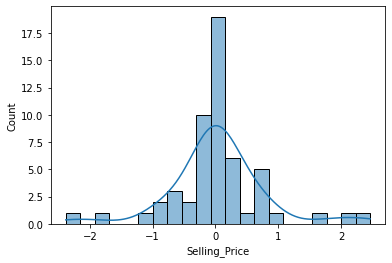

In [113]:
sns.histplot(y_test['Selling_Price']-y_pred,kde = True)

Residual normaly is also in normal distribution form

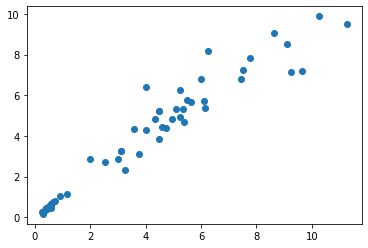

In [114]:
plt.scatter(y_test['Selling_Price'],y_pred)

Trend of Residuals are Linear in nature. So yes our model has performed perfectly good

**Validating the model**

In [115]:
print('MAE is:',mean_absolute_error(y_test,y_pred))
print('MSE is:',mean_squared_error(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE is: 0.46982727272727337
MSE is: 0.582397714363638
RMSE is: 0.7631498636333744


Perfectly fine